# House Prices Exploratory Data Analysis

Northwestern University

Master of Science in Data Science 422 - Practical Machine Learning

Group 3 - Claire Markey, Julia Granito, Manuel Hurtado, and Steve Desilets

## 1) Introduction

## 2) Methods

## 3) Exploratory Data Analysis Findings

### 3.1) Single Variable EDA

### 3.2) Analysis of Relationships Between Variables

### 3.3) Regression

## 3) Appendix - Python Code and Outputs

### 3.1) Data Preparation

First, we will set up this notebook so that it will display multiple outputs for each cell if needed.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Second, we will import the data.  We will view the first five rows of data and the shape of the dataframe to confirm that the data imported correctly.

In [2]:
import pandas as pd
housing_training_data = pd.read_csv('train.csv')

# show first five rows of the data
housing_training_data.head()
# show number of columns and rows
housing_training_data.shape
# show column names, type, and non-null counts
housing_training_data.info(verbose = True, show_counts = True)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

(1460, 81)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 3.2) Distribution of the Dependent Variable

We can begin examining the distribution of this dataset's dependent variable, sale price, by generating summary statistics for this variable.

In [3]:
housing_training_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

We can also construct a histogram and a boxplot to visualize the distribution of the sale price variable in this dataframe.

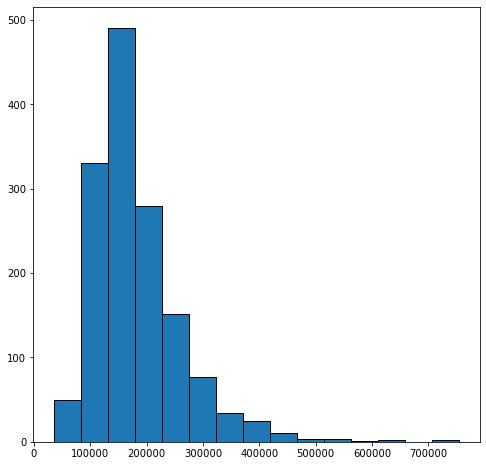

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

histogram = housing_training_data['SalePrice'].hist(edgecolor = 'black', bins = 15, figsize = (8, 8), grid = False)

<AxesSubplot:xlabel='SalePrice'>

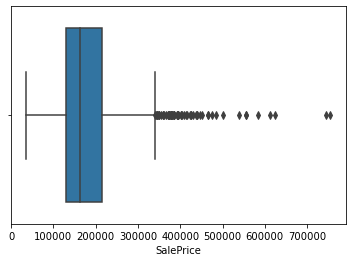

In [5]:
sns.boxplot(x=housing_training_data["SalePrice"])

### 3.3) Investigation of Missing Data and Outliers

We can take a look at the counts of reported values in each column to determine the number of missing values for each variable in the dataframe.

In [6]:
# find null counts, percentage of null values, and column type
null_count = housing_training_data.isnull().sum()
null_percentage = housing_training_data.isnull().sum() * 100 / len(housing_training_data)
column_type = housing_training_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

Missing Count  Percentage Missing Column Type
PoolQC                 1453           99.520548      object
MiscFeature            1406           96.301370      object
Alley                  1369           93.767123      object
Fence                  1179           80.753425      object
FireplaceQu             690           47.260274      object
LotFrontage             259           17.739726     float64
GarageType               81            5.547945      object
GarageYrBlt              81            5.547945     float64
GarageFinish             81            5.547945      object
GarageQual               81            5.547945      object
GarageCond               81            5.547945      object
BsmtExposure             38            2.602740      object
BsmtFinType2             38            2.602740      object
BsmtFinType1             37            2.534247      object
BsmtCond                 37            2.534247      object
BsmtQual                 37            2.534247      object
MasVnrArea                8            0.547945     float64
MasVnrType                8            0.547945      object
Electrical                1            0.068493      object

We will deal with columns that contain missing values. For the purpose of this exploratory data analysis, we will use the percentage of nulls missing, the column type, and the other columns present in the data that may provide information that can be used to fill in the missing values.

We will remove columns with over 50% Null values.

In [7]:
# PoolQC, MiscFeature, Alley, Fence all have over 50% of missing values, we will remove those from our dataframe
housing_training_data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

# show new shape
housing_training_data.shape

(1460, 77)

We will set Null values in columns that are non-numeric to None.

In [8]:
# select non-numeric columns that contain more than 1 Null value
columns_None = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond','MasVnrType','Electrical']
# set Nulls in non-numeric columns to 'None'
housing_training_data[columns_None] = housing_training_data[columns_None].fillna('None')

We determine the best way to handle nulls for each numeric column. We replace nulls in Masonry veneer area with 0, nulls in Lot Frontage with the median, and nulls in Year Garage was built with the average between the year the garage was built and year house was built .

In [9]:
# change Null values to 0 for Masonry veneer area
housing_training_data['MasVnrArea'].fillna(0, inplace=True)

# show distribution stats for Lot Frontage
housing_training_data['LotFrontage'].describe()
# fill Nulls for Lot Frontage with median value
housing_training_data['LotFrontage'].fillna(housing_training_data['LotFrontage'].median(), inplace=True)

# average years between garage being built and years built
avg_years = round((housing_training_data['GarageYrBlt'] - housing_training_data['YearBuilt']).mean())
# fill Nulls with avg bet year garage was built and year house was built 
housing_training_data['GarageYrBlt'].fillna(housing_training_data['YearBuilt']+avg_years, inplace=True)

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

We can see there are no more missing values in our original dataframe.

In [10]:
# check that there are no more missing values in the dataframe
null_count = housing_training_data.isnull().sum()
null_count[null_count != 0]

Series([], dtype: int64)

We can also create boxplots for each of the continuous variables in the dataframe to analyze whether outliers exist for each of those variables.

<AxesSubplot:xlabel='LotFrontage'>

<AxesSubplot:xlabel='LotArea'>

<AxesSubplot:xlabel='OverallQual'>

<AxesSubplot:xlabel='OverallCond'>

<AxesSubplot:xlabel='YearBuilt'>

<AxesSubplot:xlabel='YearRemodAdd'>

<AxesSubplot:xlabel='MasVnrArea'>

<AxesSubplot:xlabel='BsmtFinSF1'>

<AxesSubplot:xlabel='BsmtFinSF2'>

<AxesSubplot:xlabel='BsmtUnfSF'>

<AxesSubplot:xlabel='TotalBsmtSF'>

<AxesSubplot:xlabel='1stFlrSF'>

<AxesSubplot:xlabel='2ndFlrSF'>

<AxesSubplot:xlabel='LowQualFinSF'>

<AxesSubplot:xlabel='GrLivArea'>

<AxesSubplot:xlabel='BsmtFullBath'>

<AxesSubplot:xlabel='BsmtHalfBath'>

<AxesSubplot:xlabel='FullBath'>

<AxesSubplot:xlabel='HalfBath'>

<AxesSubplot:xlabel='BedroomAbvGr'>

<AxesSubplot:xlabel='KitchenAbvGr'>

<AxesSubplot:xlabel='TotRmsAbvGrd'>

<AxesSubplot:xlabel='Fireplaces'>

<AxesSubplot:xlabel='GarageYrBlt'>

<AxesSubplot:xlabel='GarageCars'>

<AxesSubplot:xlabel='GarageArea'>

<AxesSubplot:xlabel='WoodDeckSF'>

<AxesSubplot:xlabel='OpenPorchSF'>

<AxesSubplot:xlabel='EnclosedPorch'>

<AxesSubplot:xlabel='3SsnPorch'>

<AxesSubplot:xlabel='ScreenPorch'>

<AxesSubplot:xlabel='PoolArea'>

<AxesSubplot:xlabel='MiscVal'>

<AxesSubplot:xlabel='SalePrice'>

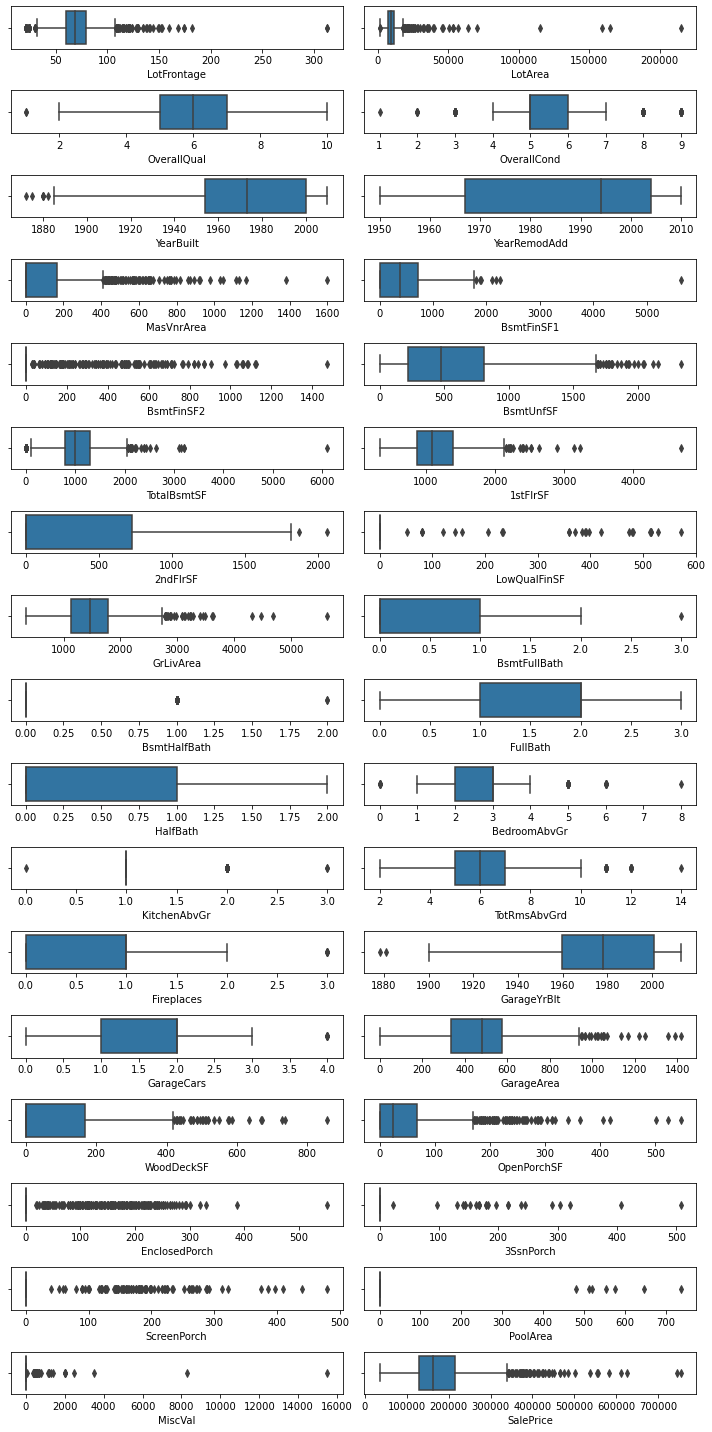

In [11]:
numerical_vars = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
                 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
                 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

fig, ax = plt.subplots(17, 2, figsize = (10, 20))

for var, subplot in zip(numerical_vars, ax.flatten()):
    sns.boxplot(x=housing_training_data[var], ax = subplot)
    
fig.tight_layout()

### 3.4) Examination of the Relationship between the Dependent Variable and Potential Predictors

We can use a correlation heatmap to quantify the correlation between the dependent variable, sale price, and the potential continuous predictor variables.

<AxesSubplot:>

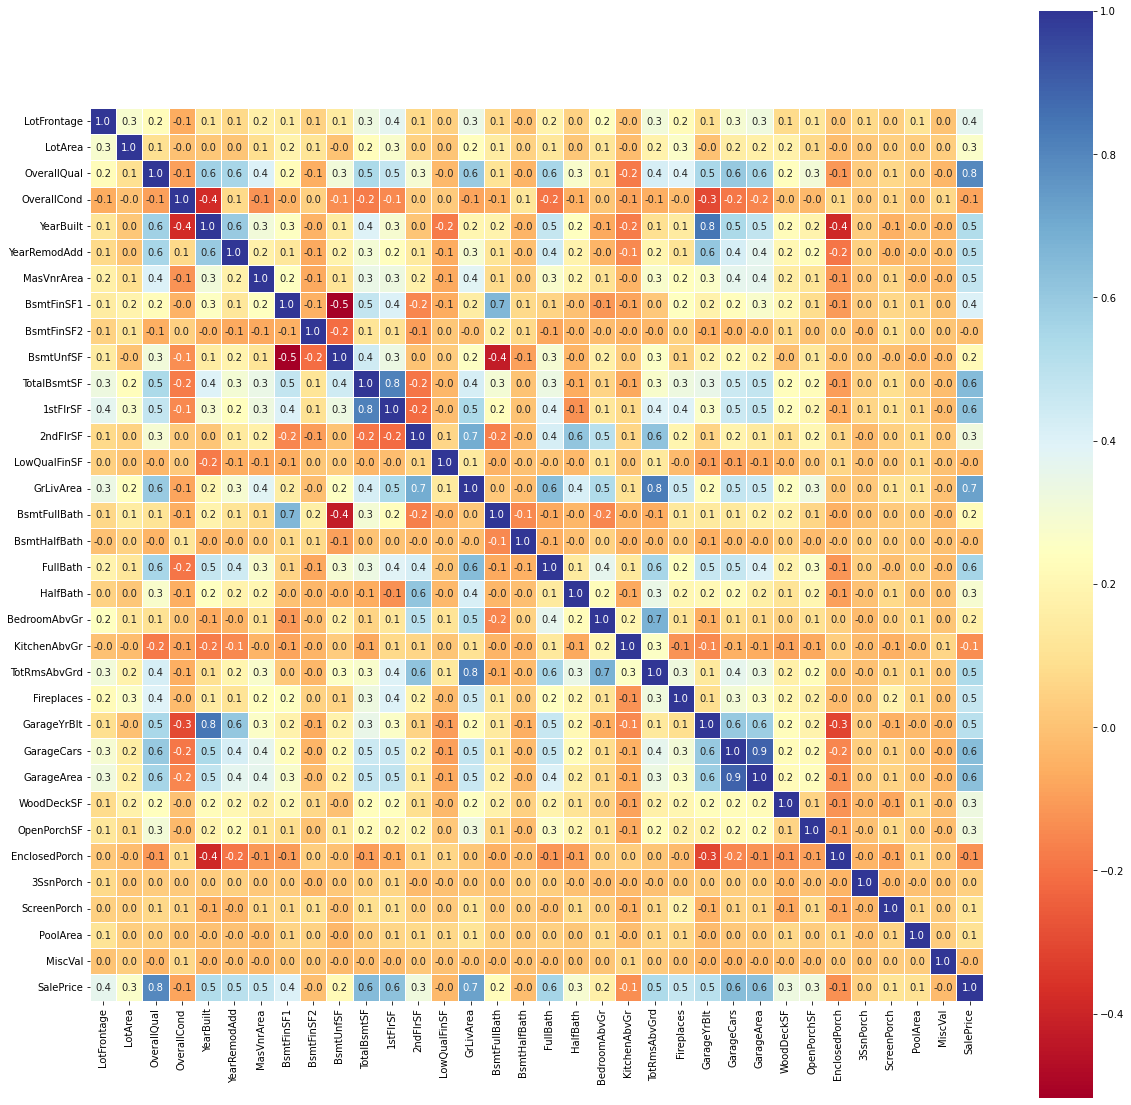

In [14]:
df_corr_housing_training = housing_training_data[numerical_vars]
corrmat_housing_training = df_corr_housing_training.corr()

f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(corrmat_housing_training, vmax = 1, square = True, annot = True,
           cmap = 'RdYlBu', linewidths = 0.5, fmt=".1f")

In [15]:
#Correlation with output variable
cor_target = abs(corrmat_housing_training["SalePrice"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features.sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.793610
GrLivArea       0.725438
TotalBsmtSF     0.646750
GarageCars      0.640489
GarageArea      0.628521
1stFlrSF        0.625772
FullBath        0.560757
TotRmsAbvGrd    0.536175
YearBuilt       0.523722
YearRemodAdd    0.507271
GarageYrBlt     0.504285
Name: SalePrice, dtype: float64

We can use jointplots to take a closer look at the relationship between sale price and the five continuous variables with strong or moderate associations: OverallQual, GrLivArea, GarageArea, Fullbath, and TotalBsmntSF.

### Below are Pearson correlations that examine the associations between variables of interest and sale price

In [16]:
from scipy import stats

#Pearson correlation coefficient and p value for sale price and OverallQual (Overall material and finish quality):
res1 = stats.pearsonr(housing_training_data.OverallQual, housing_training_data.SalePrice)
print("Pearson correlation coefficient and p value for sale price and OverallQual (Overall material and finish quality):")
res1
#Pearson correlation coefficient and p value for sale price and GrLivArea (Above grade (ground) living area square feet):
res2 = stats.pearsonr(housing_training_data.GrLivArea, housing_training_data.SalePrice)
print("Pearson correlation coefficient and p value for sale price and GrLivArea (Above grade (ground) living area square feet):")
res2
#Pearson correlation coefficient and p value for sale price and FullBath (Full bathrooms above grade):
res3 = stats.pearsonr(housing_training_data.FullBath, housing_training_data.SalePrice)
print("Pearson correlation coefficient and p value for sale price and FullBath (Full bathrooms above grade):")
res3
#Pearson correlation coefficient and p value for sale price and TotalBsmtSF (Total square feet of basement area):
res4 = stats.pearsonr(housing_training_data.TotalBsmtSF, housing_training_data.SalePrice)
print("Pearson correlation coefficient and p value for sale price and TotalBsmtSF (Total square feet of basement area):")
res4
#Pearson correlation coefficient and p value for sale price and GarageArea (Size of garage in square feet):
res5 = stats.pearsonr(housing_training_data.GarageArea, housing_training_data.SalePrice)
print("Pearson correlation coefficient and p value for sale price and GarageArea (Size of garage in square feet):")
res5

Pearson correlation coefficient and p value for sale price and OverallQual (Overall material and finish quality):


(0.7936102714422117, 1.6883742e-316)

Pearson correlation coefficient and p value for sale price and GrLivArea (Above grade (ground) living area square feet):


(0.7254377748596712, 1.7889602698205538e-238)

Pearson correlation coefficient and p value for sale price and FullBath (Full bathrooms above grade):


(0.5607567082473804, 1.6152379614657098e-121)

Pearson correlation coefficient and p value for sale price and TotalBsmtSF (Total square feet of basement area):


(0.6467501912056216, 1.6510718923467557e-173)

Pearson correlation coefficient and p value for sale price and GarageArea (Size of garage in square feet):


(0.6285208100952953, 4.1624622295554356e-161)

### Below are plots that examine the relationship between variables of interest and sale price

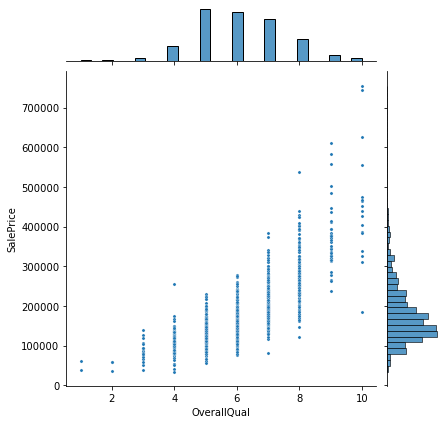

In [17]:
sns.jointplot(x='OverallQual', y='SalePrice', data = housing_training_data, joint_kws={"s": 10});

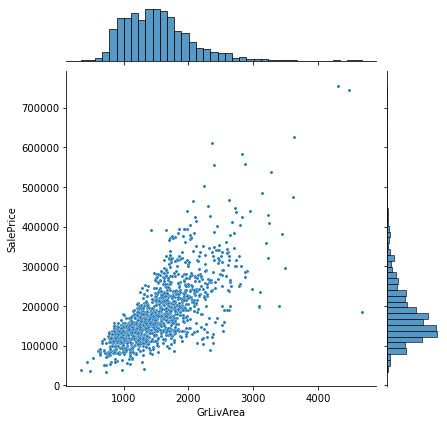

In [18]:
sns.jointplot(x='GrLivArea', y='SalePrice', data = housing_training_data, joint_kws={"s": 10});

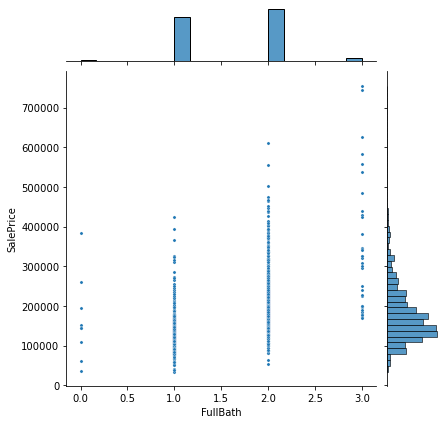

In [19]:
sns.jointplot(x='FullBath', y='SalePrice', data = housing_training_data, joint_kws={"s": 10});

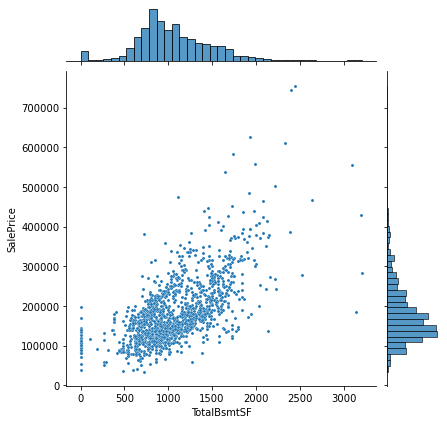

In [20]:
sns.jointplot(x='TotalBsmtSF', y='SalePrice', data = housing_training_data, joint_kws={"s": 10});

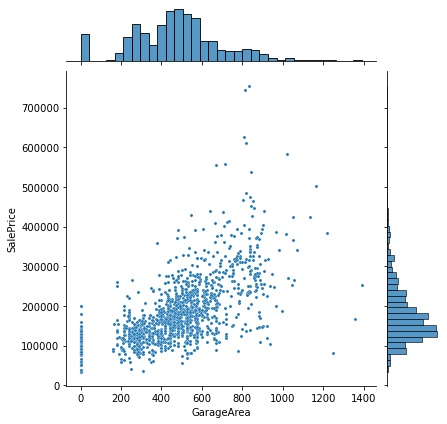

In [21]:
sns.jointplot(x='GarageArea', y='SalePrice', data = housing_training_data, joint_kws={"s": 10});

### 3.5) Feature Creation

In [22]:
# create new variable, years since the house has been remodelled (use construction date if no remodeling or additions)
housing_training_data['YrSinceRemod'] = housing_training_data['YrSold'] - housing_training_data['YearRemodAdd']

#Pearson correlation coefficient and p value for sale price and GarageArea (Size of garage in square feet):
res6 = stats.pearsonr(housing_training_data.YrSinceRemod, housing_training_data.SalePrice)
print("Pearson correlation coefficient and p value for sale price and Years since House was remodeled/built:")
res6

# create new variable TotalSF
housing_training_data['TotalSF'] = housing_training_data['TotalBsmtSF'] + housing_training_data['GrLivArea']

#Pearson correlation coefficient and p value for sale price and GarageArea (Size of garage in square feet):
res7 = stats.pearsonr(housing_training_data.TotalSF, housing_training_data.SalePrice)
print("Pearson correlation coefficient and p value for sale price and TotalSF (Total square feet - includes basement):")
res7

Pearson correlation coefficient and p value for sale price and Years since House was remodeled/built:


(-0.5092475911749608, 4.988882063937626e-97)

Pearson correlation coefficient and p value for sale price and TotalSF (Total square feet - includes basement):


(0.8166578115580188, 0.0)

### Below are simple and multiple regressions that examine the associations between variables of interest and sale price

C:\Users\cmark\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     2915.
Date:                Sat, 01 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:18:47   Log-Likelihood:                -17718.
No. Observations:                1458   AIC:                         3.544e+04
Df Residuals:                    1456   BIC:                         3.545e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.044e+04   4094.242     -7.434      0.0

<AxesSubplot:xlabel='TotalSF', ylabel='SalePrice'>

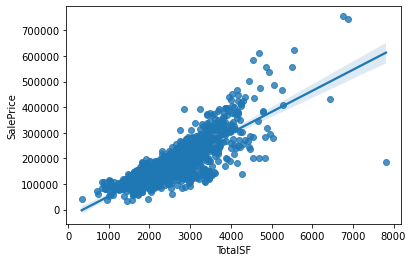

In [23]:
import statsmodels.api as sm
# New feature is highly correlated, lets try a simple linear regression
x = housing_training_data[['TotalSF']]
y = housing_training_data['SalePrice']

#add constant to predictor variables
X = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

# plot the regression model
sns.regplot(x=x, y=y)

C:\Users\cmark\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     2477.
Date:                Sat, 01 Apr 2023   Prob (F-statistic):          1.69e-316
Time:                        13:18:48   Log-Likelihood:                -17795.
No. Observations:                1458   AIC:                         3.559e+04
Df Residuals:                    1456   BIC:                         3.560e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.774e+04   5739.893    -17.029      

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

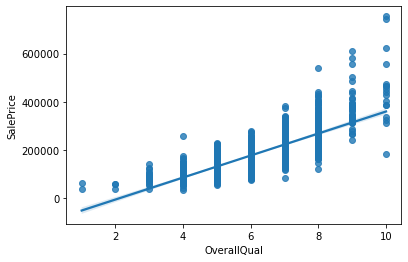

In [24]:
#Simple linear regression for sale price and OverallQual (Overall material and finish quality):
x = housing_training_data[['OverallQual']]
y = housing_training_data['SalePrice']

#add constant to predictor variables
X = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

# plot the regression model
sns.regplot(x=x, y=y)

Check the correlation between the two new variables. If they are highly correlated we won't construct a mutliple linear regression model with the both of those variables as predictors.

In [25]:
df_corr_mult_lreg = housing_training_data[['TotalSF','YrSinceRemod']]
df_corr_mult_lreg.corr()

TotalSF  YrSinceRemod
TotalSF       1.000000     -0.347313
YrSinceRemod -0.347313      1.000000

TotalSF and YrSinceRemod are not highly correlated so we will construct a multiple linear regression model using the two variables as predictors.

In [26]:
import statsmodels.api as sm
x = housing_training_data[['TotalSF','YrSinceRemod']]
y = housing_training_data['SalePrice']

#add constant to predictor variables
X = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     1916.
Date:                Sat, 01 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:18:48   Log-Likelihood:                -17579.
No. Observations:                1458   AIC:                         3.516e+04
Df Residuals:                    1455   BIC:                         3.518e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.533e+04   4550.011      3.368   

C:\Users\cmark\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


An r-squared value of 0.725 means that the model explains 72.5 percent of the variance in the dependent variable. The adjusted R-squared value is about the same as the r-squared value, indicating that we aren't overfitting the model by addding multiple variables. The omnibus test, however, indicates that residuals are not normally distributed and the high kurtosis value indicates that the distribution of the residuals are more peaked than a normal distribution. The condition number is 1.12e+04, which is quite high and suggests that there may be multicollinearity in the model.

### 3.6) Scaling of the Dependent Variable

We can create a copy of the sale price variable that has been standardized via standard scaling.  We can examine the summary statistics of this new variable to confirm we've applied standard scaling correctly to this new variable.

In [27]:
from sklearn import preprocessing
standardized_sale_price = preprocessing.scale(housing_training_data['SalePrice'])
housing_training_data['standardized_sale_price'] = standardized_sale_price.tolist()

housing_training_data['standardized_sale_price'].describe()

count    1.458000e+03
mean     1.358081e-16
std      1.000343e+00
min     -1.837513e+00
25%     -6.415045e-01
50%     -2.252141e-01
75%      4.166849e-01
max      7.225849e+00
Name: standardized_sale_price, dtype: float64

Given that the mean of the new standardized sale price variable is (approximately) 0 and the standard deviation of the new standardized sale price variable is (approximately) 1, we can have confidence that we performed the appropriate transformation correctly and successfully.

Similarly, we can create a copy of the sale price variable that has been standardized via min-max scaling.  Then, we can examine the summary statistics of this new variable to confirm we've applied min-max scaling correctly to this new variable.

In [28]:
import os
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()
 
housing_training_data[['min_max_scaled_sale_price']] = scaler.fit_transform(housing_training_data[['SalePrice']])

housing_training_data.shape
housing_training_data.head()

housing_training_data['min_max_scaled_sale_price'].describe()

(1458, 81)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... MiscVal MoSold YrSold SaleType SaleCondition  \
0    AllPub    Inside  ...       0      2   2008       WD        Normal   
1    AllPub       FR2  ...       0      5   2007       WD        Normal   
2    AllPub    Inside  ...       0      9   2008       WD        Normal   
3    AllPub    Corner  ...       0      2   2006       WD       Abnorml   
4    AllPub       FR2  ...       0     12   2008       WD        Normal   

  SalePrice  YrSinceRemod  TotalSF  standardized_sale_price  \
0    208500             5     2566                 0.347461   
1    181500            31     2524                 0.007632   
2    223500             6     2706                 0.536254   
3    140000            36     2473                -0.514698   
4    250000             8     3343                 0.869790   

   min_max_scaled_sale_price  
0                   0.241078  
1                   0.203583  
2                   0.261908  
3                   0.145952  
4                   0.298709  

[5 rows x 81 columns]

count    1458.000000
mean        0.202741
std         0.110372
min         0.000000
25%         0.131961
50%         0.177892
75%         0.248715
max         1.000000
Name: min_max_scaled_sale_price, dtype: float64

Given that the maximum value in the new min-max scaled sale price variable is 1 and the minimum value in the new min-max scaled sale price variable is 1, we can have confidence that we performed the appropriate transformation correctly and successfully.